In [1]:
import pandas as pd

In [18]:
PATH = './datasets/openfoodfacts.csv'

In [136]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import mpld3
import random
# mpld3.enable_notebook()

In [20]:
dataset = pd.read_csv(PATH, sep = '\t') 

## Read all CSVs

In [4]:
# li = []
# for _ in range(1,16):
#     path_dataset = f'./datasets/openfoodfacts_part{_}.csv'
#     dataset = pd.read_csv(PATH, sep = '\t')
#     li.append(dataset)
    
# dataset = pd.concat(li, axis=0, ignore_index=True)

C:\Users\celie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (9,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [28]:
for _ in dataset.columns:
    print(_)

Unnamed: 0
product_name
quantity
categories_tags
labels_tags
ingredients_text
additives_n
additives_tags
nutriscore_score
nutriscore_grade
nova_group
pnns_groups_1
pnns_groups_2
ecoscore_score_fr
ecoscore_grade_fr
main_category
energy-kcal_100g
energy_100g
fat_100g
saturated-fat_100g
carbohydrates_100g
sugars_100g
fiber_100g
proteins_100g
salt_100g
sodium_100g
language
ingredients_text_tokens


In [21]:
dataset[[
    "pnns_groups_1",
    "pnns_groups_2"
]]

,pnns_groups_1,pnns_groups_2
0,unknown,unknown
1,unknown,unknown
2,unknown,unknown
3,unknown,unknown
4,unknown,unknown
...,...,...
292291,unknown,unknown
292292,unknown,unknown
292293,unknown,unknown
292294,unknown,unknown


## Number per category

In [22]:
dataset.groupby("pnns_groups_1").count()["product_name"]

pnns_groups_1
Alcoholic beverages          1044
Beverages                   19769
Cereals and potatoes        27684
Composite foods             16045
Fat and sauces              25130
Fish Meat Eggs              16774
Fruits and vegetables        9621
Milk and dairy products     12487
Salty snacks                 3511
Sugary snacks               48847
unknown                    109300
Name: product_name, dtype: int64

In [34]:
# i = 0
# for _ in [
#     "energy-kcal_100g",
#     "energy_100g",
#     "fat_100g",
#     "saturated-fat_100g",
#     "carbohydrates_100g",
#     "sugars_100g",
#     "fiber_100g",
#     "proteins_100g",
#     "salt_100g",
#     "sodium_100g"
# ]:
# #     if dataset[_].isna().sum() > len(dataset)*20/100:
#         print(f'{_} : {dataset[_].isna().sum()}')
# print(i)
# dataset.shape
dataset = dataset.dropna(subset=[
    "energy-kcal_100g",
    "energy_100g",
    "fat_100g",
    "saturated-fat_100g",
    "carbohydrates_100g",
    "sugars_100g",
    "fiber_100g",
    "proteins_100g",
    "salt_100g",
    "sodium_100g"
])

## Retirer les connards

In [41]:
dataset =  dataset[dataset["energy-kcal_100g"] < 15000] 

In [91]:
dataset.shape

(215832, 28)

## Cereals and potatoes

In [151]:
X_cap = (dataset[dataset["pnns_groups_1"]=="Cereals and potatoes"])[[
    "energy-kcal_100g",
    "energy_100g",
    "fat_100g",
    "saturated-fat_100g",
    "carbohydrates_100g",
    "sugars_100g",
    "fiber_100g",
    "proteins_100g",
    "salt_100g",
    "sodium_100g"
]]

### K-means

In [64]:
model=KMeans()
# model.fit(X_cap)
label = model.fit_predict(X_cap)

In [65]:
import random
cmap = np.array([ np.random.choice(range(256), size=3)/256 for j in range(len(label))])

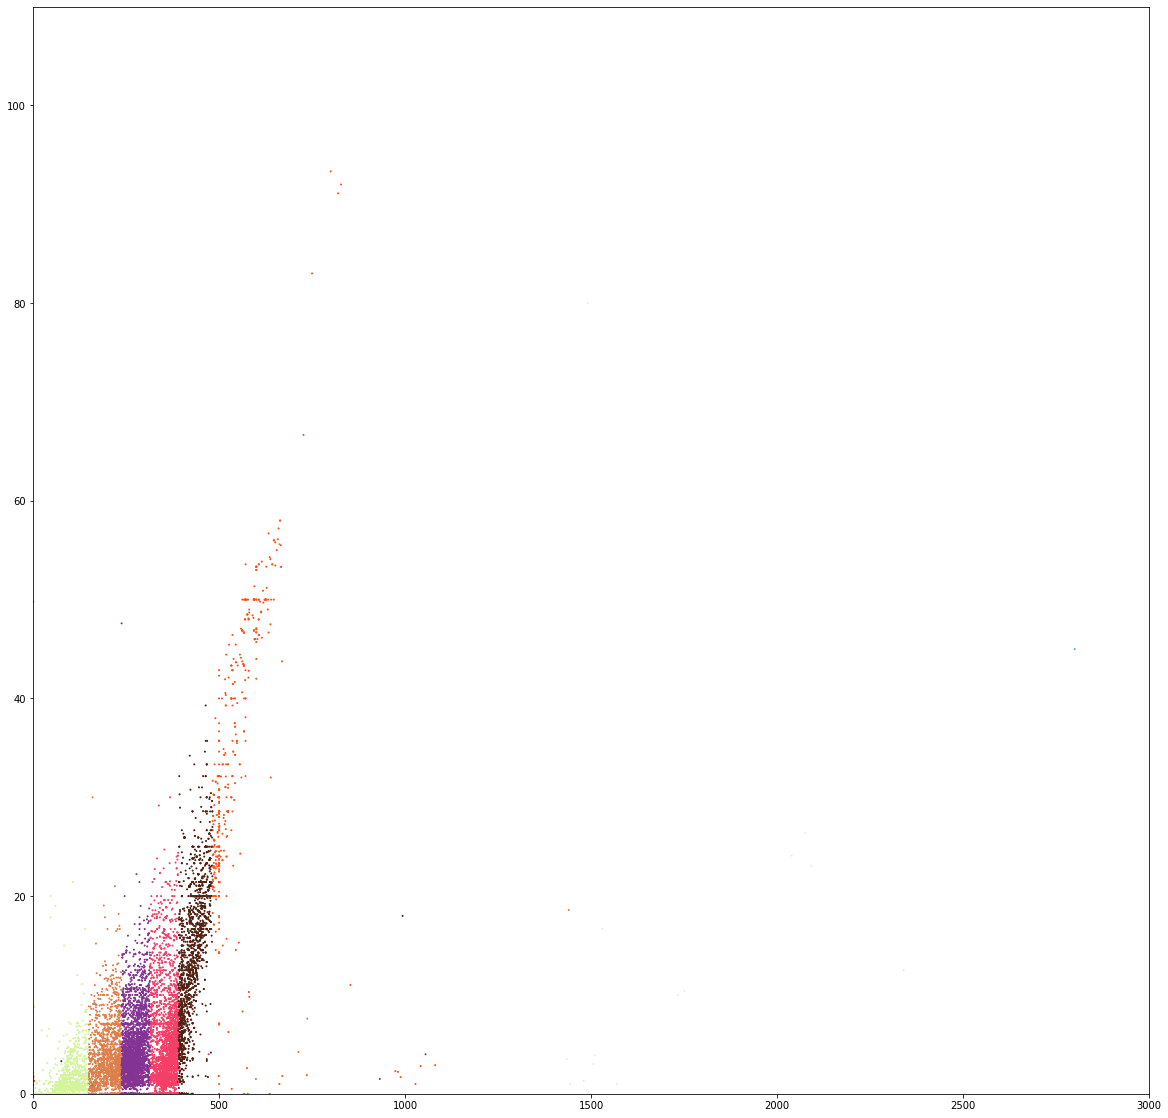

In [68]:
plt.ylim(top=110)
plt.xlim(right=3000)
plt.scatter(X_cap["energy-kcal_100g"], X_cap["fat_100g"], s=1, c=cmap[label])

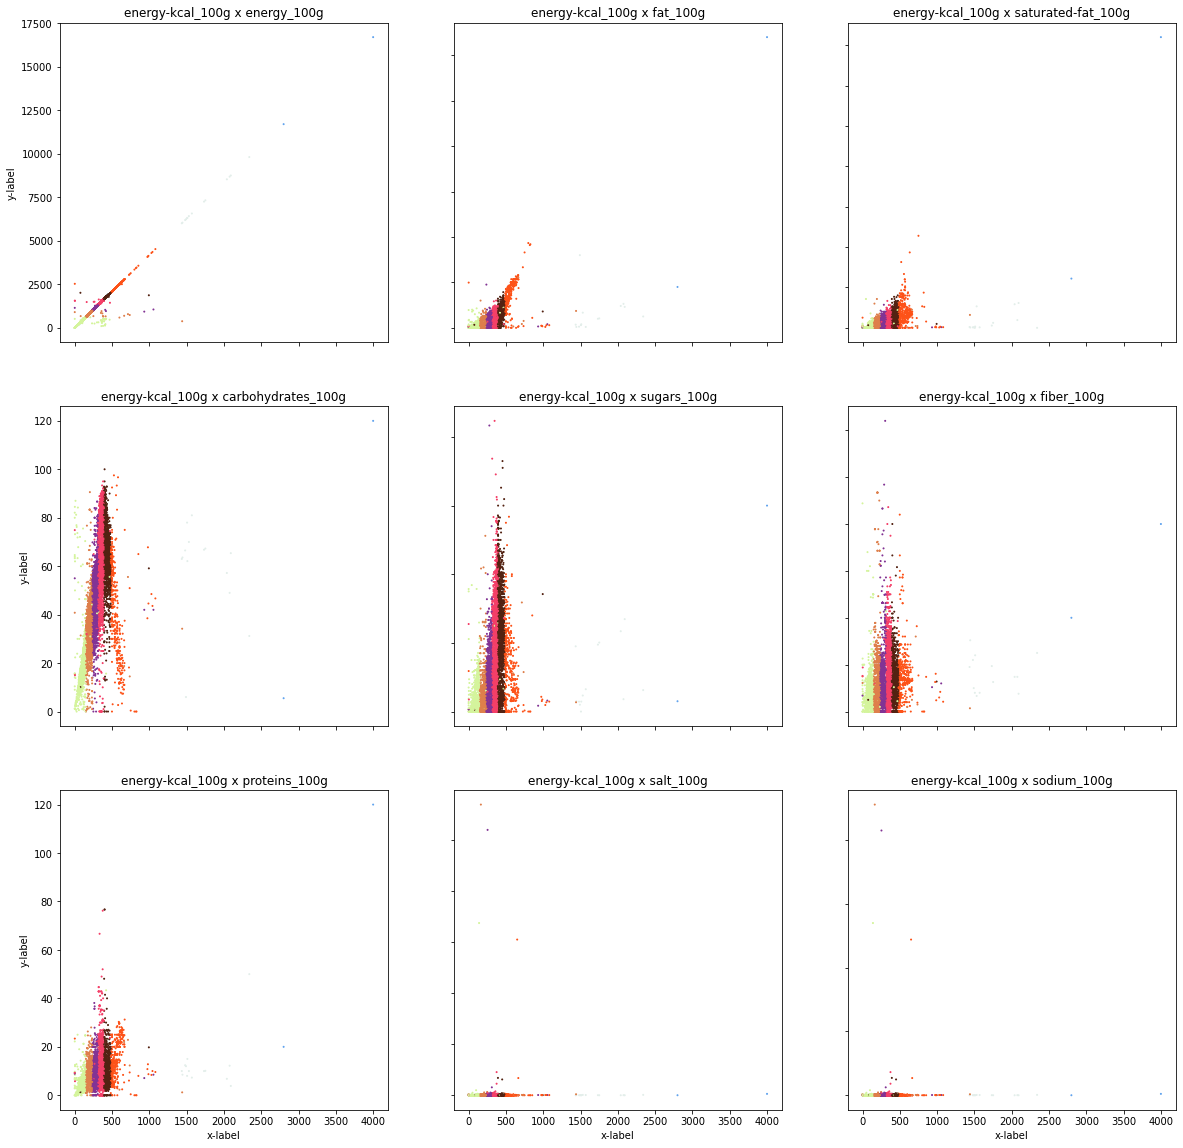

In [71]:
plt.rcParams["figure.figsize"]=20,20
fig, axs = plt.subplots(3, 3)
axs[0, 0].scatter(X_cap["energy-kcal_100g"], X_cap["energy_100g"], s=1, c=cmap[label])
axs[0, 0].set_title('energy-kcal_100g x energy_100g')
axs[0, 1].scatter(X_cap["energy-kcal_100g"], X_cap["fat_100g"], s=1, c=cmap[label])
axs[0, 1].set_title('energy-kcal_100g x fat_100g')
axs[0, 2].scatter(X_cap["energy-kcal_100g"], X_cap["saturated-fat_100g"], s=1, c=cmap[label])
axs[0, 2].set_title('energy-kcal_100g x saturated-fat_100g')
axs[1, 0].scatter(X_cap["energy-kcal_100g"], X_cap["carbohydrates_100g"], s=1, c=cmap[label])
axs[1, 0].set_title('energy-kcal_100g x carbohydrates_100g')
axs[1, 1].scatter(X_cap["energy-kcal_100g"], X_cap["sugars_100g"], s=1, c=cmap[label])
axs[1, 1].set_title('energy-kcal_100g x sugars_100g')
axs[1, 2].scatter(X_cap["energy-kcal_100g"], X_cap["fiber_100g"], s=1, c=cmap[label])
axs[1, 2].set_title('energy-kcal_100g x fiber_100g')
axs[2, 0].scatter(X_cap["energy-kcal_100g"], X_cap["proteins_100g"], s=1, c=cmap[label])
axs[2, 0].set_title('energy-kcal_100g x proteins_100g')
axs[2, 1].scatter(X_cap["energy-kcal_100g"], X_cap["salt_100g"], s=1, c=cmap[label])
axs[2, 1].set_title('energy-kcal_100g x salt_100g')
axs[2, 2].scatter(X_cap["energy-kcal_100g"], X_cap["sodium_100g"], s=1, c=cmap[label])
axs[2, 2].set_title('energy-kcal_100g x sodium_100g')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

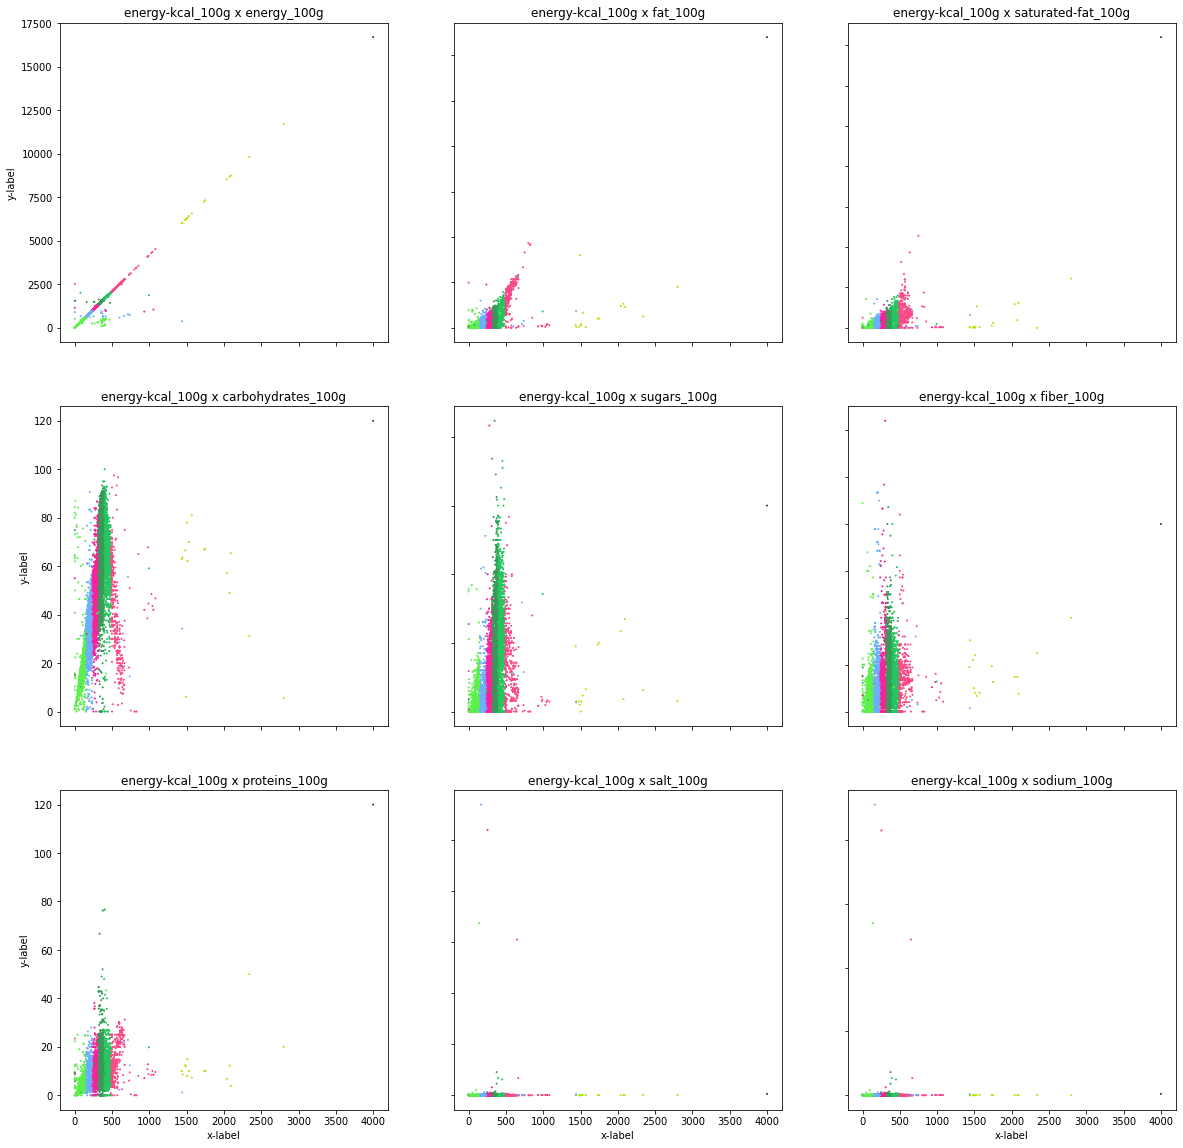

In [51]:
plt.rcParams["figure.figsize"]=20,20
fig, axs = plt.subplots(3, 3)
axs[0, 0].scatter(X_cap["energy-kcal_100g"], X_cap["energy_100g"], s=1, c=cmap[model.labels_])
axs[0, 0].set_title('energy-kcal_100g x energy_100g')
axs[0, 1].scatter(X_cap["energy-kcal_100g"], X_cap["fat_100g"], s=1, c=cmap[model.labels_])
axs[0, 1].set_title('energy-kcal_100g x fat_100g')
axs[0, 2].scatter(X_cap["energy-kcal_100g"], X_cap["saturated-fat_100g"], s=1, c=cmap[model.labels_])
axs[0, 2].set_title('energy-kcal_100g x saturated-fat_100g')
axs[1, 0].scatter(X_cap["energy-kcal_100g"], X_cap["carbohydrates_100g"], s=1, c=cmap[model.labels_])
axs[1, 0].set_title('energy-kcal_100g x carbohydrates_100g')
axs[1, 1].scatter(X_cap["energy-kcal_100g"], X_cap["sugars_100g"], s=1, c=cmap[model.labels_])
axs[1, 1].set_title('energy-kcal_100g x sugars_100g')
axs[1, 2].scatter(X_cap["energy-kcal_100g"], X_cap["fiber_100g"], s=1, c=cmap[model.labels_])
axs[1, 2].set_title('energy-kcal_100g x fiber_100g')
axs[2, 0].scatter(X_cap["energy-kcal_100g"], X_cap["proteins_100g"], s=1, c=cmap[model.labels_])
axs[2, 0].set_title('energy-kcal_100g x proteins_100g')
axs[2, 1].scatter(X_cap["energy-kcal_100g"], X_cap["salt_100g"], s=1, c=cmap[model.labels_])
axs[2, 1].set_title('energy-kcal_100g x salt_100g')
axs[2, 2].scatter(X_cap["energy-kcal_100g"], X_cap["sodium_100g"], s=1, c=cmap[model.labels_])
axs[2, 2].set_title('energy-kcal_100g x sodium_100g')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

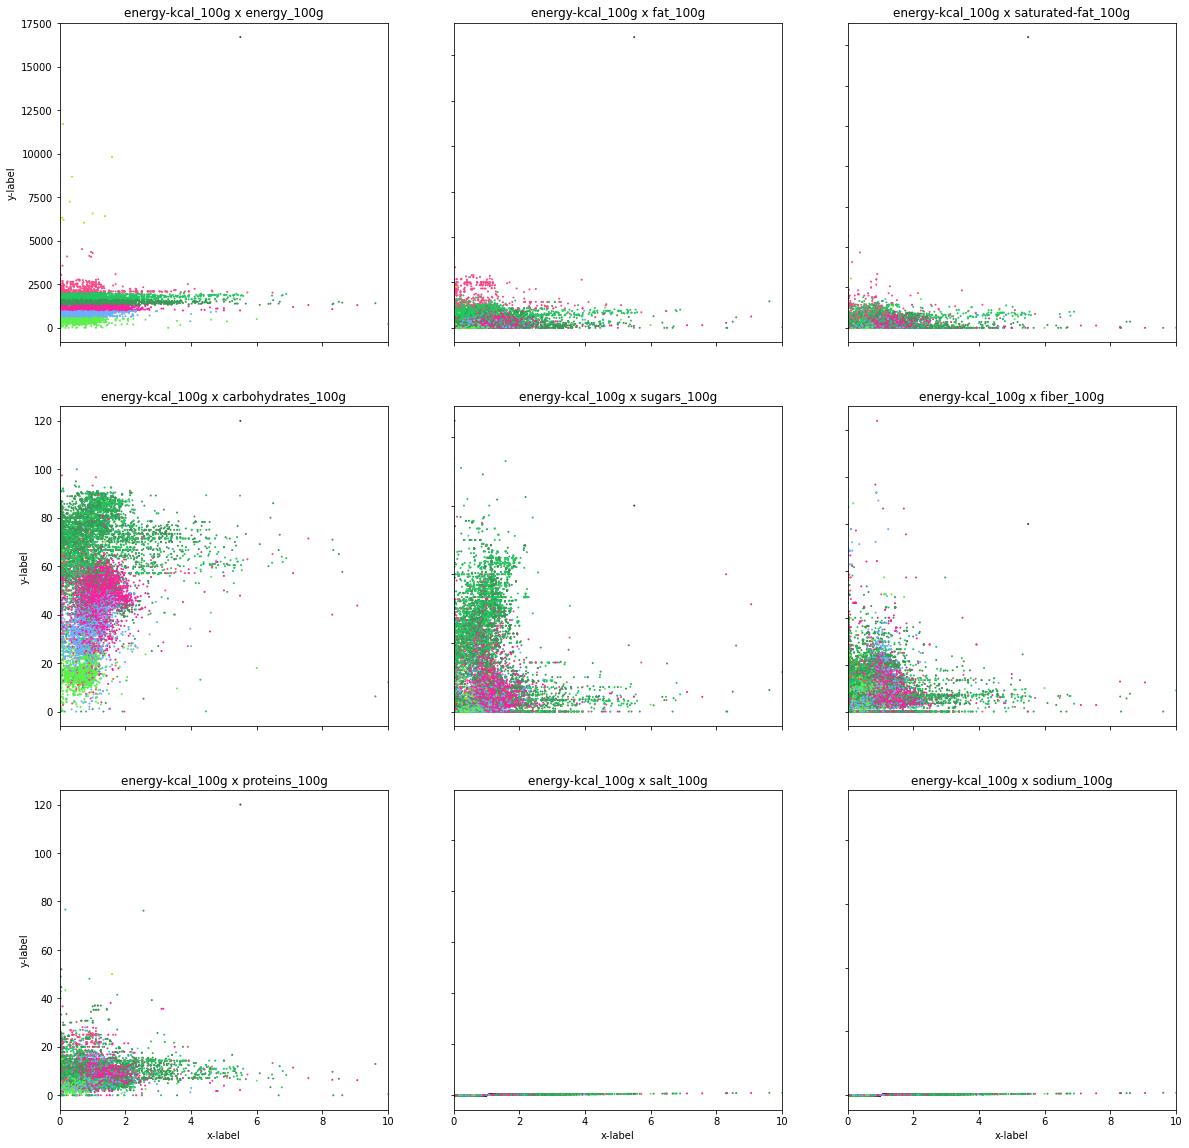

In [57]:
plt.rcParams["figure.figsize"]=20,20
fig, axs = plt.subplots(3, 3)
axs[0, 0].scatter(X_cap["salt_100g"], X_cap["energy_100g"], s=1, c=cmap[model.labels_])
axs[0, 0].set_title('energy-kcal_100g x energy_100g')
axs[0, 1].scatter(X_cap["salt_100g"], X_cap["fat_100g"], s=1, c=cmap[model.labels_])
axs[0, 1].set_title('energy-kcal_100g x fat_100g')
axs[0, 2].scatter(X_cap["salt_100g"], X_cap["saturated-fat_100g"], s=1, c=cmap[model.labels_])
axs[0, 2].set_title('energy-kcal_100g x saturated-fat_100g')
axs[1, 0].scatter(X_cap["salt_100g"], X_cap["carbohydrates_100g"], s=1, c=cmap[model.labels_])
axs[1, 0].set_title('energy-kcal_100g x carbohydrates_100g')
axs[1, 1].scatter(X_cap["salt_100g"], X_cap["sugars_100g"], s=1, c=cmap[model.labels_])
axs[1, 1].set_title('energy-kcal_100g x sugars_100g')
axs[1, 2].scatter(X_cap["salt_100g"], X_cap["fiber_100g"], s=1, c=cmap[model.labels_])
axs[1, 2].set_title('energy-kcal_100g x fiber_100g')
axs[2, 0].scatter(X_cap["salt_100g"], X_cap["proteins_100g"], s=1, c=cmap[model.labels_])
axs[2, 0].set_title('energy-kcal_100g x proteins_100g')
axs[2, 1].scatter(X_cap["salt_100g"], X_cap["salt_100g"], s=1, c=cmap[model.labels_])
axs[2, 1].set_title('energy-kcal_100g x salt_100g')
axs[2, 2].scatter(X_cap["salt_100g"], X_cap["sodium_100g"], s=1, c=cmap[model.labels_])
axs[2, 2].set_title('energy-kcal_100g x sodium_100g')

for ligne in axs:
    for _ in ligne:
        _.set_xlim([0,10])

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [59]:
X_with_labels = X_cap
X_with_labels["labels"] = model.labels_

In [62]:
(X_with_labels[X_with_labels["labels"]==0])[[
    "energy-kcal_100g",
    "energy_100g",
    "fat_100g",
    "saturated-fat_100g",
    "carbohydrates_100g",
    "sugars_100g",
    "fiber_100g",
    "proteins_100g",
    "salt_100g",
    "sodium_100g"
]].head()

,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
164,263.0,1100.0,3.51,0.0,52.63,8.77,7.0,7.02,1.7100,0.684
176,256.0,1071.0,2.56,0.0,53.85,2.56,2.6,7.69,0.8025,0.321
376,269.0,1125.0,3.85,0.0,46.15,3.85,0.0,7.69,1.2500,0.500
377,256.0,1071.0,4.65,0.0,46.51,4.65,2.3,9.30,1.2200,0.488
378,256.0,1071.0,4.65,0.0,46.51,4.65,2.3,9.30,1.2200,0.488


In [63]:
(X_with_labels[X_with_labels["labels"]==1])[[
    "energy-kcal_100g",
    "energy_100g",
    "fat_100g",
    "saturated-fat_100g",
    "carbohydrates_100g",
    "sugars_100g",
    "fiber_100g",
    "proteins_100g",
    "salt_100g",
    "sodium_100g"
]].head()

,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
433,436.0,1824.0,10.91,0.91,74.550000,25.45,5.5,9.09,0.2500,0.100
453,400.0,1674.0,14.55,2.73,60.000000,21.82,7.3,9.09,0.1125,0.045
673,435.0,1820.0,15.22,6.52,69.570000,52.17,0.0,4.35,0.7600,0.304
1859,423.0,1770.0,16.50,1.60,40.799999,2.40,11.8,25.00,3.1800,1.272
2254,397.0,1661.0,9.59,1.37,72.600000,17.81,8.2,8.22,0.4275,0.171


In [ ]:
"energy-kcal_100g",
    "energy_100g",
    "fat_100g",
    "saturated-fat_100g",
    "carbohydrates_100g",
    "sugars_100g",
    "fiber_100g",
    "proteins_100g",
    "salt_100g",
    "sodium_100g"

# K-means with PCA

## PCA

In [72]:
from sklearn.decomposition import PCA

In [73]:
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(X_cap)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))

# >> Explained variation per principal component: [0.36198848 0.1920749 ]

print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

# >> Cumulative variance explained by 2 principal components: 55.41%


Explained variation per principal component: [0.99631547 0.00126498]
Cumulative variance explained by 2 principal components: 99.76%


In [82]:
model=KMeans(5)
# model.fit(X_cap)
label = model.fit_predict(pca_2_result)

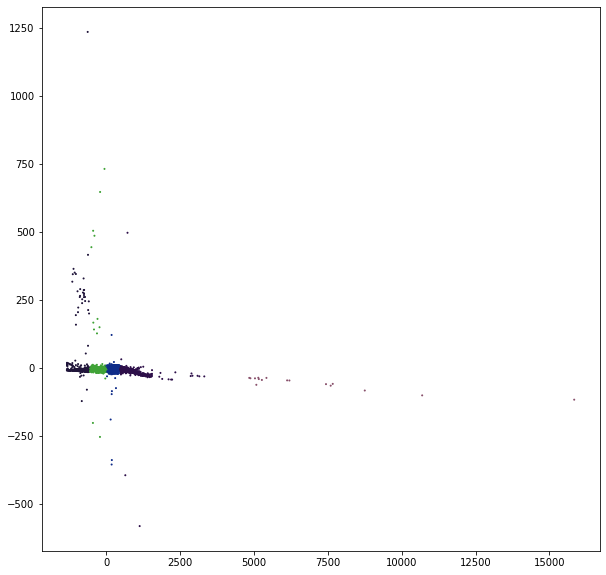

In [84]:
plt.rcParams["figure.figsize"]=10,10
cmap = np.array([ np.random.choice(range(256), size=3)/256 for j in range(len(label))])
plt.scatter(pca_2_result[:,0], pca_2_result[:,1], s=1, c=cmap[label])

In [152]:
X_with_labels = X_cap.copy()
X_with_labels["labels"] = label
X_with_labels["product_name"] = dataset["product_name"]

In [153]:
(X_with_labels[X_with_labels["labels"]==0])[[
    "energy-kcal_100g",
    "energy_100g",
    "fat_100g",
    "saturated-fat_100g",
    "carbohydrates_100g",
    "sugars_100g",
    "fiber_100g",
    "proteins_100g",
    "salt_100g",
    "sodium_100g"
]].head()

,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
125,365.000000,1527.0,1.18,0.0,71.760000,4.710000,2.4,12.940000,1.19634,0.478536
325,360.000000,1506.0,0.00,0.0,78.000000,0.000000,2.0,12.000000,0.00000,0.000000
331,333.000000,1393.0,0.00,0.0,0.000000,0.000000,0.0,66.670000,0.00000,0.000000
349,355.555556,1488.0,0.00,0.0,75.555556,2.222222,7.5,15.555556,0.00000,0.000000
421,333.000000,1393.0,20.00,0.0,33.330000,6.670000,0.0,6.670000,0.08250,0.033000


In [154]:
len(set(label))

5

In [139]:
with open("kmeans_by_nutri_fact.txt", "w+") as f:
    for col in X_cap.columns:
        print(col)
        for _ in set(label):
            f.write(f"\tLabel {_}\n")

    #         Median
            f.write(f"\t\tMedian = {(X_with_labels[X_with_labels['labels']==_])[[ col ]].median()[0] }\n" )

    #         Min    
            f.write(f"\t\tMin = { (X_with_labels[X_with_labels['labels']==_])[[ col ]].min()[0] }\n")
            for product in ( X_with_labels[ (X_with_labels[ col ] == (X_with_labels[X_with_labels["labels"]==_])[[ col ]].min()[0] ) & (X_with_labels["labels"]==_) ] )["product_name"]:
                product_line = dataset[ dataset['product_name'] == product]
                

    #         Max
            f.write(f"\t\tMax = { (X_with_labels[X_with_labels['labels']==_])[[ col ]].max()[0] }\n")
            for product in ( X_with_labels[ (X_with_labels[ col ] == (X_with_labels[X_with_labels["labels"]==_])[[ col ]].max()[0] ) & (X_with_labels["labels"]==_) ] )["product_name"]:
                f.write(f"{dataset[ dataset['product_name'] == product]}\n")

            f.write("----------\n")


        f.write("-------------------------------------------\n")
        
    f.close()

energy-kcal_100g
energy_100g
fat_100g


UnicodeEncodeError: 'charmap' codec can't encode characters in position 2622-2624: character maps to <undefined>

In [155]:
X_cap.columns

Index(['energy-kcal_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g'],
      dtype='object')

In [156]:
for col in X_cap.columns:
    print(col)
    for _ in set(label):
        print(f"\tLabel {_}")

#         Median
        print(f"\t\tMedian = {(X_with_labels[X_with_labels['labels']==_])[[ col ]].median()[0] }" )

#         Min    
        print(f"\t\tMin = { (X_with_labels[X_with_labels['labels']==_])[[ col ]].min()[0] }")
        for product in ( X_with_labels[ (X_with_labels[ col ] == (X_with_labels[X_with_labels["labels"]==_])[[ col ]].min()[0] ) & (X_with_labels["labels"]==_) ] )["product_name"]:
            product_line = dataset[ dataset['product_name'] == product]
            print(f"\t\t\t{product_line['product_name'].values[0]}")
            for column in dataset.columns.tolist():
                print(f"\t\t\t\t{column} : {product_line[column].values[0]}")
            break
            

#         Max
        print(f"\t\tMax = { (X_with_labels[X_with_labels['labels']==_])[[ col ]].max()[0] }")
        for product in ( X_with_labels[ (X_with_labels[ col ] == (X_with_labels[X_with_labels["labels"]==_])[[ col ]].max()[0] ) & (X_with_labels["labels"]==_) ] )["product_name"]:
            product_line = dataset[ dataset['product_name'] == product]
            print(f"\t\t\t{product_line['product_name'].values[0]}")
            for column in dataset.columns.tolist():
                print(f"\t\t\t\t{column} : {product_line[column].values[0]}")
            break

        print("----------")


    print("-------------------------------------------")

energy-kcal_100g
	Label 0
		Median = 364.0
		Min = 0.372
			Right Start Fruit & Fibre
				Unnamed: 0 : 20416
				product_name : Right Start Fruit & Fibre
				quantity : 420 g
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:breakfasts,en:cereals-and-their-products,en:breakfast-cereals,en:flakes,en:cereal-flakes,en:extruded-cereals,en:extruded-flakes,en:mixed-cereal-flakes
				labels_tags : en:vegetarian
				ingredients_text : cls (70%) (wht, roll oats, triticale, puff wht), sultanas (13%) (sultanas, vae oil), sugar, apricot flavour fruit flak (4%) (contains apricot purée (1%), humtant (glycol), acidity rulator (malic acid), gling agt (ptin), antioxidant (ascorc acid), natural flavour, natural colour (annatto)), barl malt extract, diary fie (oligofructose), salt, vitamins (thiamin, riflavin, niacin, folic acid), minal (iron), natural flavour.
				additives_n : 5.0
				additives_tags : en:e160b,en:e296,en:e300,en:e422,en:e440
				nu

		Median = 1651.5
		Min = 1435.0
			Muesli with Fruits
				Unnamed: 0 : 43790
				product_name : Muesli with Fruits
				quantity : 500g
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:breakfasts,en:cereals-and-their-products,en:breakfast-cereals,en:mueslis,en:cereals-with-fruits,en:mueslis-with-fruits
				labels_tags : nan
				ingredients_text : cl flak 77% (oat flak, wht flak, rye flak), mixture of dri and candi fruit 20% (raisins, nana (nana, sugar, coconut oil), papaya (papaya, sugar, sulphur dioxide) , pinpple (pinpple, sugar, acid: citric acid, sulphur dioxide), date(date, rice flour)), corn flak 3% (corn grits, sugar, salt, rl malt tract)
				additives_n : 2.0
				additives_tags : en:e220,en:e330
				nutriscore_score : 9.0
				nutriscore_grade : c
				nova_group : 3.0
				pnns_groups_1 : Cereals and potatoes
				pnns_groups_2 : Breakfast cereals
				ecoscore_score_fr : 92.0
				ecoscore_grade_fr : b
				main_category : en:m

				energy-kcal_100g : 1081.0
				energy_100g : 4523.0
				fat_100g : 2.9
				saturated-fat_100g : 0.4
				carbohydrates_100g : 46.7
				sugars_100g : 2.9
				fiber_100g : 2.1
				proteins_100g : 9.6
				salt_100g : 0.68
				sodium_100g : 0.272
				language : en
				ingredients_text_tokens : ['fortifi', 'british', 'wht', 'flour', 'wht', 'flour', 'calcium', 'carnate', 'iron', 'niacin', 'thiamin', 'wat', 's', 'salt', 'rapd', 'oil', 'tra', 'virgin', 'olive', 'oil', '%', 'soya', 'flour', 'rice', 'flour', 'wht', 'glut', 'fmt', 'wht', 'flour', 'flour', 'trtmt', 'agt', 'ascorc', 'acid']
----------
	Label 3
		Median = 385.0
		Min = 0.0
			La fe, white beans
				Unnamed: 0 : 49119
				product_name : La fe, white beans
				quantity : nan
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:legumes-and-their-products,en:legumes,en:seeds,en:legume-seeds,en:pulses,en:common-beans,en:white-beans,en:vegetable-mixes
				labels_tags : nan
				ingredients_text : white ans.
		

				energy_100g : 2506.0
				fat_100g : 50.0
				saturated-fat_100g : 12.0
				carbohydrates_100g : 19.0
				sugars_100g : 14.0
				fiber_100g : 6.4
				proteins_100g : 25.0
				salt_100g : 1.7
				sodium_100g : 0.68
				language : en
				ingredients_text_tokens : ['roast', 'pnuts', '%', 'dtrose', 'sunflow', 'oil', 'hard', 'palm', 'fat', 'salt', 'durchschnittliche', 'n', 'wte', 'je', 'g', 'avage', 'nutrition', 'va', 'p', 'g', 'brnwt', 'engy', 'ft', 'fat']
----------
	Label 2
		Median = 17.86
		Min = 0.0
			Minnesota quick cooking wild rice
				Unnamed: 0 : 32460
				product_name : Minnesota quick cooking wild rice
				quantity : nan
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:seeds,en:cereals-and-their-products,en:cereal-grains,en:rices
				labels_tags : nan
				ingredients_text : 100% minnota cultivat wild rice
				additives_n : 0.0
				additives_tags : nan
				nutriscore_score : -3.0
				nutriscore_grade : a
				nova_group 

				energy-kcal_100g : 393.0
				energy_100g : 1644.0
				fat_100g : 16.07
				saturated-fat_100g : 17.86
				carbohydrates_100g : 60.71
				sugars_100g : 17.86
				fiber_100g : 7.1
				proteins_100g : 10.71
				salt_100g : 0.0
				sodium_100g : 0.0
				language : en
				ingredients_text_tokens : ['oats', 'hon', 'canola', 'oil', 'natural', 'chry', 'flavor', 'sugar', 'wat', 'alcohol', 'natural', 'flavors', 'citric', 'acid', 'chri', 'r', 'tart', 'pitt', 'chri', 'sugar', 'sunflow', 'oil', 'almonds', 'coconut', 'and', 'cinnamon']
----------
	Label 1
		Median = 0.0
		Min = 0.0
			German fine bread
				Unnamed: 0 : 828
				product_name : German fine bread
				quantity : nan
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:breads
				labels_tags : nan
				ingredients_text : rye flour, wat, whole wht flour, an flour, malt, molass, rye ml, caraway sds, salt, yst.
				additives_n : 0.0
				additives_tags : nan
				nutriscore_score : 6.0
			

				product_name : Creamy Peanut Butter
				quantity : nan
				categories_tags : nan
				labels_tags : nan
				ingredients_text : roast pnuts, sugar, hydrogat vae oil, (cottonsd, soyan and rapd oil) to prt saration, salt.
				additives_n : 0.0
				additives_tags : nan
				nutriscore_score : nan
				nutriscore_grade : nan
				nova_group : 4.0
				pnns_groups_1 : unknown
				pnns_groups_2 : unknown
				ecoscore_score_fr : nan
				ecoscore_grade_fr : nan
				main_category : nan
				energy-kcal_100g : 594.0
				energy_100g : 2485.0
				fat_100g : 50.0
				saturated-fat_100g : 9.38
				carbohydrates_100g : 18.75
				sugars_100g : 9.38
				fiber_100g : 6.2
				proteins_100g : 21.88
				salt_100g : 1.19126
				sodium_100g : 0.476504
				language : en
				ingredients_text_tokens : ['roast', 'pnuts', 'sugar', 'hydrogat', 'vae', 'oil', 'cottonsd', 'soyan', 'and', 'rapd', 'oil', 'to', 'prt', 'saration', 'salt']
----------
-------------------------------------------
carbohydrates_100g
	Label 0
		M

				ingredients_text : mill corn, sugar, contains 2% or ls of malt flavor, corn syrup, modifi corn starch, dtrose, salt, gatin, natural flavor, t for frhns. vitamins and minals: iron (fric phosphate), vitamin c (ascorc acid), niacinamide, vitamin  (pyridoxine hydrochloride), vitamin  (riflavin), vitamin  (thiamin hydrochloride), vitamin a palmitate, folic acid, vitamin , vitamin d3.
				additives_n : 1.0
				additives_tags : en:e428
				nutriscore_score : 13.0
				nutriscore_grade : d
				nova_group : 4.0
				pnns_groups_1 : Cereals and potatoes
				pnns_groups_2 : Breakfast cereals
				ecoscore_score_fr : 40.0
				ecoscore_grade_fr : c
				main_category : en:corn-flakes
				energy-kcal_100g : 379.0
				energy_100g : 110.0
				fat_100g : 0.0
				saturated-fat_100g : 0.0
				carbohydrates_100g : 89.66
				sugars_100g : 41.38
				fiber_100g : 0.0
				proteins_100g : 3.45
				salt_100g : 1.12
				sodium_100g : 0.448
				language : en
				ingredients_text_tokens : ['mill', 'corn', 'sugar',

			Got Kosher, Original Mini Pretzel Challah Enriched Bread
				Unnamed: 0 : 29401
				product_name : Got Kosher, Original Mini Pretzel Challah Enriched Bread
				quantity : nan
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:breads
				labels_tags : nan
				ingredients_text : unch rich wht flour (wht flour, malt rl flour, niacin, ruc iron, thiamin mononitrate, riflavin, folic acid, ascorc acid), wat, non-gmo canola oil, cane sugar (van procs), salt, yst, sodium hydroxide, calcium sulfate, wht starch, wht flour and 2% or ls of ch of the following: zym (contains wht), salt.
				additives_n : 0.0
				additives_tags : nan
				nutriscore_score : 22.0
				nutriscore_grade : e
				nova_group : 3.0
				pnns_groups_1 : Cereals and potatoes
				pnns_groups_2 : Bread
				ecoscore_score_fr : nan
				ecoscore_grade_fr : nan
				main_category : en:breads
				energy-kcal_100g : 454.0
				energy_100g : 1900.0
				fat_100g : 13.51
				saturated-

			Giant white enriched bread, white
				Unnamed: 0 : 2168
				product_name : Giant white enriched bread, white
				quantity : nan
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:breads
				labels_tags : en:designated-origin-denomination
				ingredients_text : unch rich wht flour (wht flour, malt rl flour, niacin, iron, thiamin mononitrate, riflavin, folic acid), wat, high fructose corn syrup, yst, contains 2% or ls of the following: soyan and/ or canola oil, salt, wht glut, do
				additives_n : 0.0
				additives_tags : nan
				nutriscore_score : 4.0
				nutriscore_grade : c
				nova_group : 4.0
				pnns_groups_1 : Cereals and potatoes
				pnns_groups_2 : Bread
				ecoscore_score_fr : nan
				ecoscore_grade_fr : nan
				main_category : en:breads
				energy-kcal_100g : 269.0
				energy_100g : 1125.0
				fat_100g : 3.85
				saturated-fat_100g : 0.0
				carbohydrates_100g : 46.15
				sugars_100g : 3.85
				fiber_100g : 0.0
				prote

		Min = 0.0
			Rice cakes
				Unnamed: 0 : 4697
				product_name : Rice cakes
				quantity : nan
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:cereals-and-their-products,en:puffed-cereal-cakes,en:puffed-rice-cakes
				labels_tags : en:no-gluten
				ingredients_text : source of fibre sv 3 - ch cake provid engy} fai isaturatsugars salt  i o. : &lt;o.lg ko.lg &lt;o.lg
				additives_n : 0.0
				additives_tags : nan
				nutriscore_score : 8.0
				nutriscore_grade : c
				nova_group : nan
				pnns_groups_1 : Cereals and potatoes
				pnns_groups_2 : Cereals
				ecoscore_score_fr : 74.0
				ecoscore_grade_fr : b
				main_category : en:puffed-rice-cakes
				energy-kcal_100g : 386.0
				energy_100g : 1615.0
				fat_100g : 2.0
				saturated-fat_100g : 1.0
				carbohydrates_100g : 1.0
				sugars_100g : 1.0
				fiber_100g : 0.0
				proteins_100g : 0.0
				salt_100g : 1.0
				sodium_100g : 0.4
				language : en
				ingredients_text_tokens : 

				ecoscore_grade_fr : nan
				main_category : en:common-beans
				energy-kcal_100g : 420.6501
				energy_100g : 528.0
				fat_100g : 16.6667
				saturated-fat_100g : 2.6667
				carbohydrates_100g : 15.6667
				sugars_100g : 9.3333
				fiber_100g : 5.2
				proteins_100g : 43.3333
				salt_100g : 0.16666675
				sodium_100g : 0.0666667
				language : en
				ingredients_text_tokens : ['roast', 'black', 'soyan', '%', 'sugar', 'cocoa', 'powd', '%', 'coff', 'powd', 's', 'salt', '%', 'maltodtrin', 'corn', 'starch', 'vanilla', 'extract']
----------
	Label 4
		Median = 10.05
		Min = 3.85
			Graham pie crust
				Unnamed: 0 : 6926
				product_name : Graham pie crust
				quantity : nan
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:cereals-and-their-products,en:pie-dough
				labels_tags : nan
				ingredients_text : enrich flour (wht flour, niacin, ruc iron, vitamin  [thiamin mononitrate], vitamin  [riflavin], folic acid), palm and palm kn 

				main_category : en:peanut-butters
				energy-kcal_100g : 570.0
				energy_100g : 2385.0
				fat_100g : 48.0
				saturated-fat_100g : 7.5
				carbohydrates_100g : 21.0
				sugars_100g : 3.0
				fiber_100g : 9.4
				proteins_100g : 21.0
				salt_100g : 0.0
				sodium_100g : 0.0
				language : en
				ingredients_text_tokens : ['dry', 'roast', 'pnuts']
		Max = 610.1842
			Crunchy Nutty Peanut Butter
				Unnamed: 0 : 48997
				product_name : Crunchy Nutty Peanut Butter
				quantity : 12 oz
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:legumes-and-their-products,en:spreads,en:nuts-and-their-products,en:plant-based-spreads,en:oilseed-purees,en:legume-butters,en:nut-butters,en:peanut-butters
				labels_tags : nan
				ingredients_text : roast _pnuts_, sugar, salt, fully hydrogat _soya_ oil.
				additives_n : 0.0
				additives_tags : nan
				nutriscore_score : 25.0
				nutriscore_grade : e
				nova_group : 3.0
				pnns_groups_1 : Cereals and potatoes
				pn

				energy-kcal_100g : 250.0
				energy_100g : 1046.0
				fat_100g : 3.57
				saturated-fat_100g : 0.0
				carbohydrates_100g : 42.86
				sugars_100g : 3.57
				fiber_100g : 7.1
				proteins_100g : 10.71
				salt_100g : 0.0
				sodium_100g : 0.0
				language : en
				ingredients_text_tokens : ['whole', 'wht', 'flour', 'wat', 'wht', 'glut', 'sugar', 'contains', '%', 'or', 'ls', 'of', 'the', 'following', 'soyan', 'and', 'or', 'canola', 'oil', 'yst', 'molass', 'dough', 'conditions', 'hoxylat', 'mono', '-', 'and', 'diglycid', 'mono', '-', 'and', 'diglycid', 'monoglycid', 'ascorc', 'acid', 'zym', 'malt', 'rl', 'flour', 'calcium', 'propionate', 'prvative', 'ammonium', 'sulfate', 'soy', 'lithin', 'vinar']
		Max = 415.0
			White Bread
				Unnamed: 0 : 19224
				product_name : White Bread
				quantity : nan
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:breads,en:white-breads
				labels_tags : nan
				ingredients_text : wht flour, malt r

In [ ]:
for col in X_cap.columns:
    for _ in set(label):
        print( (X_with_labels[X_with_labels["labels"]==_])[[ col ]].min() )
        print( (X_with_labels[X_with_labels["labels"]==_])[[ col ]].median() )
        print( (X_with_labels[X_with_labels["labels"]==_])[[ col ]].max() )
    
    print("-------------------------------------------")

## K-means with PCA with log

In [157]:
X_cap = (dataset[dataset["pnns_groups_1"]=="Cereals and potatoes"])[[
    "energy-kcal_100g",
    "energy_100g",
    "fat_100g",
    "saturated-fat_100g",
    "carbohydrates_100g",
    "sugars_100g",
    "fiber_100g",
    "proteins_100g",
    "salt_100g",
    "sodium_100g"
]]

In [162]:
import math
X_cap["energy-kcal_100g"] = X_cap["energy-kcal_100g"].apply(lambda x : math.log(x) if x!=0 else 0)
X_cap["energy_100g"] = X_cap["energy_100g"].apply(lambda x : math.log(x) if x!=0 else 0)

In [164]:
X_cap

,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
125,5.899897,7.331060,1.1800,0.0,71.7600,4.71,2.4,12.9400,1.196340,0.478536
164,5.572154,7.003065,3.5100,0.0,52.6300,8.77,7.0,7.0200,1.710000,0.684000
165,5.429346,6.860664,2.6300,0.0,47.3700,8.77,1.8,5.2600,1.402500,0.561000
175,5.459586,6.890609,1.4700,0.0,50.0000,5.88,2.9,8.8200,1.250000,0.500000
176,5.545177,6.976348,2.5600,0.0,53.8500,2.56,2.6,7.6900,0.802500,0.321000
...,...,...,...,...,...,...,...,...,...,...
292033,6.173786,7.608374,25.0000,12.7,53.9000,7.00,3.3,9.8000,3.785000,1.514000
292047,5.424950,6.856462,4.6000,2.2,46.0000,4.50,0.5,12.6000,0.203200,0.081280
292071,5.961005,7.392032,11.9000,2.0,60.4000,19.30,12.2,10.9000,5.334000,2.133600
292073,5.971262,7.402452,3.9000,1.4,81.2000,6.60,6.5,8.1000,0.000000,0.000000


In [165]:
from sklearn.decomposition import PCA

In [166]:
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(X_cap)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))

# >> Explained variation per principal component: [0.36198848 0.1920749 ]

print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

# >> Cumulative variance explained by 2 principal components: 55.41%


Explained variation per principal component: [0.56904979 0.18714033]
Cumulative variance explained by 2 principal components: 75.62%


In [167]:
model=KMeans(5)
# model.fit(X_cap)
label = model.fit_predict(pca_2_result)

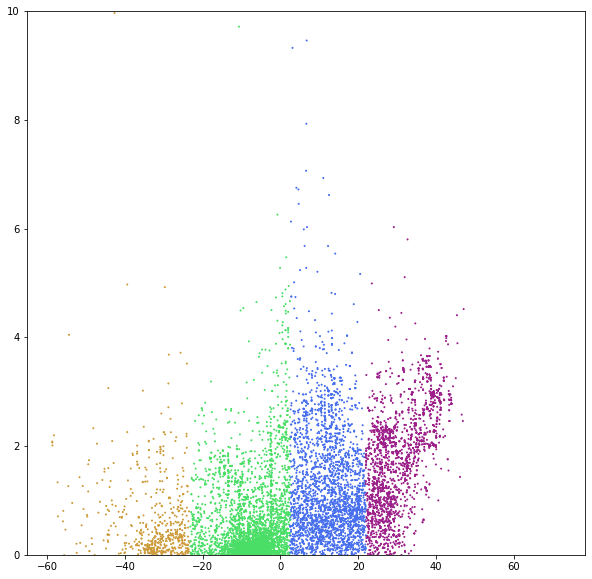

In [172]:
plt.rcParams["figure.figsize"]=10,10
cmap = np.array([ np.random.choice(range(256), size=3)/256 for j in range(len(label))])
plt.ylim(top=10)
plt.scatter(pca_2_result[:,0], pca_2_result[:,1], s=1, c=cmap[label])

### 

In [173]:
X_with_labels = X_cap.copy()
X_with_labels["labels"] = label
X_with_labels["product_name"] = dataset["product_name"]

In [174]:
(X_with_labels[X_with_labels["labels"]==0])[[
    "energy-kcal_100g",
    "energy_100g",
    "fat_100g",
    "saturated-fat_100g",
    "carbohydrates_100g",
    "sugars_100g",
    "fiber_100g",
    "proteins_100g",
    "salt_100g",
    "sodium_100g"
]].head()

,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
164,5.572154,7.003065,3.51,0.0,52.63,8.77,7.0,7.02,1.7100,0.684
165,5.429346,6.860664,2.63,0.0,47.37,8.77,1.8,5.26,1.4025,0.561
175,5.459586,6.890609,1.47,0.0,50.00,5.88,2.9,8.82,1.2500,0.500
176,5.545177,6.976348,2.56,0.0,53.85,2.56,2.6,7.69,0.8025,0.321
376,5.594711,7.025538,3.85,0.0,46.15,3.85,0.0,7.69,1.2500,0.500


In [175]:
for col in X_cap.columns:
    print(col)
    for _ in set(label):
        print(f"\tLabel {_}")

#         Median
        print(f"\t\tMedian = {(X_with_labels[X_with_labels['labels']==_])[[ col ]].median()[0] }" )

#         Min    
        print(f"\t\tMin = { (X_with_labels[X_with_labels['labels']==_])[[ col ]].min()[0] }")
        for product in ( X_with_labels[ (X_with_labels[ col ] == (X_with_labels[X_with_labels["labels"]==_])[[ col ]].min()[0] ) & (X_with_labels["labels"]==_) ] )["product_name"]:
            product_line = dataset[ dataset['product_name'] == product]
            print(f"\t\t\t{product_line['product_name'].values[0]}")
            for column in dataset.columns.tolist():
                print(f"\t\t\t\t{column} : {product_line[column].values[0]}")
            break
            

#         Max
        print(f"\t\tMax = { (X_with_labels[X_with_labels['labels']==_])[[ col ]].max()[0] }")
        for product in ( X_with_labels[ (X_with_labels[ col ] == (X_with_labels[X_with_labels["labels"]==_])[[ col ]].max()[0] ) & (X_with_labels["labels"]==_) ] )["product_name"]:
            product_line = dataset[ dataset['product_name'] == product]
            print(f"\t\t\t{product_line['product_name'].values[0]}")
            for column in dataset.columns.tolist():
                print(f"\t\t\t\t{column} : {product_line[column].values[0]}")
            break

        print("----------")


    print("-------------------------------------------")

energy-kcal_100g
	Label 0
		Median = 5.58724865840025
		Min = -2.3025850929940455
			Golden wholemeal
				Unnamed: 0 : 1892
				product_name : Golden wholemeal
				quantity : 2.4 kg
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:cereals-and-their-products,en:flours,en:cereal-flours,en:wheat-flours,en:breads,en:bread-flours,en:sliced-breads,en:wheat-bread-flour
				labels_tags : nan
				ingredients_text : wht wholl 62%, triticale wholl, glut, non-iodis salt, ulsifi , malt flour, inactive yst, rosary tract, ascorc acid, zyme, thiamine, folic acid,
				additives_n : 3.0
				additives_tags : en:e392,en:e481,en:e491
				nutriscore_score : 7.0
				nutriscore_grade : c
				nova_group : 4.0
				pnns_groups_1 : Cereals and potatoes
				pnns_groups_2 : Bread
				ecoscore_score_fr : 68.0
				ecoscore_grade_fr : b
				main_category : en:wheat-bread-flour
				energy-kcal_100g : 0.1
				energy_100g : 903.0
				fat_100g : 1.7
				saturated-fat

				energy-kcal_100g : 2800.0
				energy_100g : 11700.0
				fat_100g : 45.0
				saturated-fat_100g : 30.5
				carbohydrates_100g : 5.5
				sugars_100g : 3.0
				fiber_100g : 20.0
				proteins_100g : 20.0
				salt_100g : 0.1
				sodium_100g : 0.04
				language : en
				ingredients_text_tokens : ['%', 'flaxsd', '%', 'almonds', '%', 'azil', 'nuts', '%', 'walnuts', 'waxy', 'maize', 'starch', 'co-zyme', 'q-']
----------
	Label 4
		Median = 5.942799375126701
		Min = 0.0
			Cereales soufflees Quinoa
				Unnamed: 0 : 12512
				product_name : Cereales soufflees Quinoa
				quantity : 260 g (9.17 oz)
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:breakfasts,en:cereals-and-their-products,en:breakfast-cereals
				labels_tags : en:gluten-free-vegan
				ingredients_text : organic white rice flour, organic quinoa flour, organic cane sugar and organic cocoa powd
				additives_n : 0.0
				additives_tags : nan
				nutriscore_score : 1.0
				nutris

				energy_100g : 2724.0
				fat_100g : 53.45
				saturated-fat_100g : 11.47
				carbohydrates_100g : 18.23
				sugars_100g : 9.46
				fiber_100g : 4.75
				proteins_100g : 24.47
				salt_100g : 610.1842
				sodium_100g : 244.07368
				language : en
				ingredients_text_tokens : ['roast', 'pnuts', 'sugar', 'salt', 'fully', 'hydrogat', 'soya', 'oil']
----------
	Label 3
		Median = 6.113682179832232
		Min = 0.0
			Peas assorted sizes
				Unnamed: 0 : 17607
				product_name : Peas assorted sizes
				quantity : 398ml
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:legumes-and-their-products,en:legumes,en:seeds,en:legume-seeds,en:pulses,en:peas
				labels_tags : nan
				ingredients_text : ps (assort siz), wat, sugar, salt
				additives_n : 0.0
				additives_tags : nan
				nutriscore_score : -6.0
				nutriscore_grade : a
				nova_group : 3.0
				pnns_groups_1 : Cereals and potatoes
				pnns_groups_2 : Legumes
				ecoscore_score_fr : nan
				ecoscore_grade_fr 

				main_category : nan
				energy-kcal_100g : 524.0
				energy_100g : 2192.0
				fat_100g : 28.57
				saturated-fat_100g : 7.14
				carbohydrates_100g : 57.14
				sugars_100g : 23.81
				fiber_100g : 0.0
				proteins_100g : 4.76
				salt_100g : 0.84582
				sodium_100g : 0.338328
				language : en
				ingredients_text_tokens : ['graham', 'ml', 'rich', 'wht', 'flour', 'wht', 'flour', 'niacin', 'ruc', 'iron', 'thiamin', 'mononitrate', 'riflavin', 'folic', 'acid', 'sugar', 'whole', 'wht', 'flour', 'partially', 'hydrogat', 'soyan', 'oil', 'own', 'sugar', 'high', 'fructose', 'corn', 'syrup', 'hon', 'sodium', 'carnate', 'salt', 'molass', 'soy', 'lithin', 'malt', 'syrup', 'artificial', 'flavor', 'partially', 'hydrogat', 'vae', 'shorting', 'contains', 'soyan', 'and', 'or', 'cottonsd', 'oil', 'sugar', 'corn', 'starch', 'prvative', 'a', 'tq', 'citric', 'acid', 'propyle', 'glycol']
----------
	Label 2
		Median = 3.66
		Min = 0.61
			Racconto, small potato dumplings, potato gnocchetti
				Unnamed:

		Min = 0.0
			Sliced Plain Bagel
				Unnamed: 0 : 527
				product_name : Sliced Plain Bagel
				quantity : nan
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:breads,en:special-breads,en:bagel-breads
				labels_tags : nan
				ingredients_text : unch rich flour (wht flour, rl malt flour, niacin, ruc iron, thiamin mononitrate, riflavin, folic acid), wat, sugar, contains 2% or ls of: wht glut, wht flour, salt, yst, distill vinar, cultur corn syrup solids, cul
				additives_n : 0.0
				additives_tags : nan
				nutriscore_score : 3.0
				nutriscore_grade : c
				nova_group : 4.0
				pnns_groups_1 : Cereals and potatoes
				pnns_groups_2 : Bread
				ecoscore_score_fr : 74.0
				ecoscore_grade_fr : b
				main_category : en:bagel-breads
				energy-kcal_100g : 365.0
				energy_100g : 1527.0
				fat_100g : 1.18
				saturated-fat_100g : 0.0
				carbohydrates_100g : 71.76
				sugars_100g : 4.71
				fiber_100g : 2.4
				proteins_100g : 12.94

		Min = 30.43
			Mini nutty pumpkin bread., nutty pumpkin
				Unnamed: 0 : 29938
				product_name : Mini nutty pumpkin bread., nutty pumpkin
				quantity : nan
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:breads
				labels_tags : nan
				ingredients_text : pumpkin, gs, cash flour, hon, maple syrup, pan ml, gold flaxsd ml, pans, ls than 2% of: coconut flour, king soda, crm of tartar, cinnamon, s salt, clov, nutm, ging
				additives_n : 2.0
				additives_tags : en:e336,en:e336i,en:e500,en:e500ii
				nutriscore_score : 11.0
				nutriscore_grade : d
				nova_group : 3.0
				pnns_groups_1 : Cereals and potatoes
				pnns_groups_2 : Bread
				ecoscore_score_fr : nan
				ecoscore_grade_fr : nan
				main_category : en:breads
				energy-kcal_100g : 326.0
				energy_100g : 1364.0
				fat_100g : 19.57
				saturated-fat_100g : 3.26
				carbohydrates_100g : 30.43
				sugars_100g : 21.74
				fiber_100g : 4.3
				proteins_100g : 8.7
				salt_

		Median = 82.76
		Min = 69.090909090909
			Melange à crêpes
				Unnamed: 0 : 33932
				product_name : Melange à crêpes
				quantity : 500g
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:seeds,en:cereals-and-their-products,en:cereal-grains,en:avena,en:oat,fr:melange-a-crepes
				labels_tags : en:organic,en:canada-organic
				ingredients_text : sifted wheat flour, *oat flour, *cream of wheat, baking powder seasalt. *stoneground and organic) may contain rl, soy and triticale.
				additives_n : 0.0
				additives_tags : nan
				nutriscore_score : 13.0
				nutriscore_grade : d
				nova_group : nan
				pnns_groups_1 : Cereals and potatoes
				pnns_groups_2 : Cereals
				ecoscore_score_fr : 73.0
				ecoscore_grade_fr : b
				main_category : fr:melange-a-crepes
				energy-kcal_100g : 363.63636363636
				energy_100g : 1521.0
				fat_100g : 3.6363636363636
				saturated-fat_100g : 0.36363636363636
				carbohydrates_100g : 69.090909090909


		Median = 1.0
		Min = 0.0
			Augason Farms, Vital Wheat Gluten
				Unnamed: 0 : 1452
				product_name : Augason Farms, Vital Wheat Gluten
				quantity : nan
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:cereals-and-their-products
				labels_tags : nan
				ingredients_text : vital wht glut.
				additives_n : 0.0
				additives_tags : nan
				nutriscore_score : -1.0
				nutriscore_grade : a
				nova_group : nan
				pnns_groups_1 : Cereals and potatoes
				pnns_groups_2 : Cereals
				ecoscore_score_fr : nan
				ecoscore_grade_fr : nan
				main_category : en:cereals-and-their-products
				energy-kcal_100g : 333.0
				energy_100g : 1393.0
				fat_100g : 0.0
				saturated-fat_100g : 0.0
				carbohydrates_100g : 0.0
				sugars_100g : 0.0
				fiber_100g : 0.0
				proteins_100g : 66.67
				salt_100g : 0.0
				sodium_100g : 0.0
				language : en
				ingredients_text_tokens : ['vital', 'wht', 'glut']
		Max = 26.0
			Breakfast Biscuits Top

		Min = 0.0
			Chicago Flats, Gourmet Flatbread, Sea Salt
				Unnamed: 0 : 3366
				product_name : Chicago Flats, Gourmet Flatbread, Sea Salt
				quantity : nan
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:breads
				labels_tags : nan
				ingredients_text : flour, wat, soyan oil, sugar, yst, salt, s salt
				additives_n : 0.0
				additives_tags : nan
				nutriscore_score : 15.0
				nutriscore_grade : d
				nova_group : 3.0
				pnns_groups_1 : Cereals and potatoes
				pnns_groups_2 : Bread
				ecoscore_score_fr : nan
				ecoscore_grade_fr : nan
				main_category : en:breads
				energy-kcal_100g : 389.0
				energy_100g : 1628.0
				fat_100g : 8.33
				saturated-fat_100g : 0.0
				carbohydrates_100g : 72.22
				sugars_100g : 5.56
				fiber_100g : 0.0
				proteins_100g : 11.11
				salt_100g : 2.5
				sodium_100g : 1.0
				language : en
				ingredients_text_tokens : ['flour', 'wat', 'soyan', 'oil', 'sugar', 'yst', 'salt', 's', 'sal

				energy_100g : 586.0
				fat_100g : 4.5
				saturated-fat_100g : 0.0
				carbohydrates_100g : 23.0
				sugars_100g : 9.0
				fiber_100g : 3.0
				proteins_100g : 1.0
				salt_100g : 675.0
				sodium_100g : 270.0
				language : en
				ingredients_text_tokens : ['sweet', 'potatoes', 'cane', 'sugar', 'cor', 'starch', 'vegetable', 'oil', 'contains', 'one', 'or', 'more', 'of', 'the', 'following', 'high', 'oleic', 'canola', 'canola', 'sunflower', 'rice', 'flour', 'tapioca', 'starch', 'dextrin', 'sea', 'salt', 'natural', 'flavour', 'spice', 'salad', 'mustard', 'powder', 'vinegar', 'mustard', 'seed', 'salt', 'turmeric', 'paprika', 'xanthan', 'gum', 'contains', 'mustard']
		Max = 24.47
			Crunchy Nutty Peanut Butter
				Unnamed: 0 : 48997
				product_name : Crunchy Nutty Peanut Butter
				quantity : 12 oz
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:legumes-and-their-products,en:spreads,en:nuts-and-their-products,en:plant-based-spreads,en:oilseed-purees,en

			Creamy wheat cereal
				Unnamed: 0 : 1444
				product_name : Creamy wheat cereal
				quantity : nan
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:cereals-and-their-products
				labels_tags : nan
				ingredients_text : wht.
				additives_n : 0.0
				additives_tags : nan
				nutriscore_score : -3.0
				nutriscore_grade : a
				nova_group : 1.0
				pnns_groups_1 : Cereals and potatoes
				pnns_groups_2 : Cereals
				ecoscore_score_fr : nan
				ecoscore_grade_fr : nan
				main_category : en:cereals-and-their-products
				energy-kcal_100g : 360.0
				energy_100g : 1506.0
				fat_100g : 0.0
				saturated-fat_100g : 0.0
				carbohydrates_100g : 78.0
				sugars_100g : 0.0
				fiber_100g : 2.0
				proteins_100g : 12.0
				salt_100g : 0.0
				sodium_100g : 0.0
				language : en
				ingredients_text_tokens : ['wht']
		Max = 68.0466
			Extra Wide Egg Noodles
				Unnamed: 0 : 5811
				product_name : Extra Wide Egg Noodles
				quantity : 

				energy-kcal_100g : 321.0
				energy_100g : 1343.0
				fat_100g : 1.79
				saturated-fat_100g : 0.0
				carbohydrates_100g : 57.14
				sugars_100g : 1.79
				fiber_100g : 14.3
				proteins_100g : 17.86
				salt_100g : 0.0
				sodium_100g : 0.0
				language : en
				ingredients_text_tokens : ['enrich', 'solina', 'iron', 'frous', 'sulfate', 'and', 'b', 'vitamins', 'niacin', 'thiamin', 'mononitrate', 'riflavin', 'folic', 'acid', 'modifi', 'wht', 'starch', 'wht', 'protn', 'isolate', 'whole', 'wht', 'flour', 'whole', 'rl', 'flour', 'whole', 'oat', 'flour', 'flaxsd']
		Max = 24.8
			Lizi💕 s
				Unnamed: 0 : 35747
				product_name : Lizi💕 s
				quantity : 350
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:breakfasts,en:cereals-and-their-products,en:breakfast-cereals,en:granola-vegan-vegetarian,en:protein-boosted-toasted-wholegrain-granola-high-protein-high-in-fibre-natural-flavoring-whole-grain
				labels_tags : en:27-of-your-daily-

		Min = 0.0
			Bean Threads
				Unnamed: 0 : 13771
				product_name : Bean Threads
				quantity : nan
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:cereals-and-their-products,en:noodles
				labels_tags : nan
				ingredients_text : mung an starch, p starch, potato starch, wat.
				additives_n : 0.0
				additives_tags : nan
				nutriscore_score : 3.0
				nutriscore_grade : c
				nova_group : 3.0
				pnns_groups_1 : Cereals and potatoes
				pnns_groups_2 : Cereals
				ecoscore_score_fr : nan
				ecoscore_grade_fr : nan
				main_category : en:noodles
				energy-kcal_100g : 350.87719298246
				energy_100g : 1468.0
				fat_100g : 0.0
				saturated-fat_100g : 0.0
				carbohydrates_100g : 87.719298245614
				sugars_100g : 0.0
				fiber_100g : 1.8
				proteins_100g : 0.0
				salt_100g : 0.0
				sodium_100g : 0.0
				language : en
				ingredients_text_tokens : ['mung', 'an', 'starch', 'p', 'starch', 'potato', 'starch', 'wat']
		Max = 36.

# Old version

## Get upper category

In [5]:
dataset["big_category"] = dataset["categories_tags"].apply(lambda x : x.split(",")[0])

In [6]:
len(dataset["big_category"].unique())

130

## Keep only interesting columns

In [7]:
dataset = dataset[[
"product_name",
"categories_tags",
"nutriscore_score",
"nutriscore_grade",
"energy-kj_100g",
"energy_100g",
"energy-kcal_100g",
"energy-from-fat_100g",
"fat_100g",
"saturated-fat_100g",
"-butyric-acid_100g",
"-caproic-acid_100g",
"-caprylic-acid_100g",
"-capric-acid_100g",
"-lauric-acid_100g",
"-myristic-acid_100g",
"-palmitic-acid_100g",
"-stearic-acid_100g",
"-arachidic-acid_100g",
"-behenic-acid_100g",
"-lignoceric-acid_100g",
"-cerotic-acid_100g",
"-montanic-acid_100g",
"-melissic-acid_100g",
"monounsaturated-fat_100g",
"polyunsaturated-fat_100g",
"omega-3-fat_100g",
"-alpha-linolenic-acid_100g",
"-eicosapentaenoic-acid_100g",
"-docosahexaenoic-acid_100g",
"omega-6-fat_100g",
"-linoleic-acid_100g",
"-arachidonic-acid_100g",
"-gamma-linolenic-acid_100g",
"-dihomo-gamma-linolenic-acid_100g",
"omega-9-fat_100g",
"-oleic-acid_100g",
"-elaidic-acid_100g",
"-gondoic-acid_100g",
"-mead-acid_100g",
"-erucic-acid_100g",
"-nervonic-acid_100g",
"trans-fat_100g",
"cholesterol_100g",
"carbohydrates_100g",
"sugars_100g",
"-sucrose_100g",
"-glucose_100g",
"-fructose_100g",
"-lactose_100g",
"-maltose_100g",
"-maltodextrins_100g",
"starch_100g",
"polyols_100g",
"fiber_100g",
"-soluble-fiber_100g",
"-insoluble-fiber_100g",
"proteins_100g",
"casein_100g",
"serum-proteins_100g",
"nucleotides_100g",
"salt_100g",
"sodium_100g",
"alcohol_100g",
"vitamin-a_100g",
"beta-carotene_100g",
"vitamin-d_100g",
"vitamin-e_100g",
"vitamin-k_100g",
"vitamin-c_100g",
"vitamin-b1_100g",
"vitamin-b2_100g",
"vitamin-pp_100g",
"vitamin-b6_100g",
"vitamin-b9_100g",
"folates_100g",
"vitamin-b12_100g",
"biotin_100g",
"pantothenic-acid_100g",
"silica_100g",
"bicarbonate_100g",
"potassium_100g",
"chloride_100g",
"calcium_100g",
"phosphorus_100g",
"iron_100g",
"magnesium_100g",
"zinc_100g",
"copper_100g",
"manganese_100g",
"fluoride_100g",
"selenium_100g",
"chromium_100g",
"molybdenum_100g",
"iodine_100g",
"caffeine_100g",
"taurine_100g",
"ph_100g",
"fruits-vegetables-nuts_100g",
"fruits-vegetables-nuts-dried_100g",
"fruits-vegetables-nuts-estimate_100g",
"collagen-meat-protein-ratio_100g",
"cocoa_100g",
"chlorophyl_100g",
"carbon-footprint_100g",
"carbon-footprint-from-meat-or-fish_100g",
"nutrition-score-fr_100g",
"nutrition-score-uk_100g",
"glycemic-index_100g",
"water-hardness_100g",
"choline_100g",
"phylloquinone_100g",
"beta-glucan_100g",
"inositol_100g",
"carnitine_100g",
"ingredients_en",
    "big_category"
]]

## Retirer les lignes des catégories qui ont moins de 20% de valeurs non renseignés

In [8]:
i = 0
for _ in dataset.columns:
    if dataset[_].isna().sum() < len(dataset)*20/100:
        print(f'{_} : {dataset[_].isna().sum()}')
        i+=1
        dataset = dataset.dropna(subset=[_])
print(i)

product_name : 0
categories_tags : 0
nutriscore_score : 97350
nutriscore_grade : 0
energy_100g : 15
energy-kcal_100g : 1890
fat_100g : 0
saturated-fat_100g : 105
trans-fat_100g : 26865
cholesterol_100g : 2325
carbohydrates_100g : 0
sugars_100g : 0
fiber_100g : 3390
proteins_100g : 0
salt_100g : 0
sodium_100g : 0
vitamin-c_100g : 75855
calcium_100g : 915
iron_100g : 300
nutrition-score-fr_100g : 0
ingredients_en : 0
big_category : 0
22


In [9]:
dataset.shape

(303720, 117)

## Retirer les connards

In [10]:
dataset =  dataset[dataset["energy-kcal_100g"] < 15000] 

## Define X

In [20]:
df = dataset[[
    "fat_100g",
#     "saturated-fat_100g",
#     "sugars_100g",
#     "fiber_100g"
    "nutriscore_score"
]]

In [21]:
df = dataset[[
    "energy-kcal_100g",
    "fat_100g",
    "saturated-fat_100g",
    "sugars_100g",
    "fiber_100g",
    "nutriscore_score"
]]

In [28]:
df = dataset[[
    "energy-kcal_100g",
    "fat_100g",
    "saturated-fat_100g",
    "trans-fat_100g",
    "cholesterol_100g",
    "carbohydrates_100g",
    "sugars_100g",
    "fiber_100g",
    "proteins_100g",
    "salt_100g",
    "sodium_100g",
    "vitamin-c_100g",
    "calcium_100g",
    "iron_100g",
    "nutriscore_score"
]]

# K-means 

## Predict big category

In [29]:
model=KMeans(n_clusters=len(dataset["big_category"].unique()))
model.fit(df)

KMeans(n_clusters=41)

In [30]:
print(model.labels_)

[27 25 25 ... 18 13 13]


In [31]:
import random
cmap = np.array([ np.random.choice(range(256), size=3)/256 for j in range(len(dataset["big_category"].unique()))])

In [32]:
cat = dataset["big_category"].unique().tolist()
dataset["big_category_number"] = dataset["big_category"].apply(lambda x : cat.index(x) )

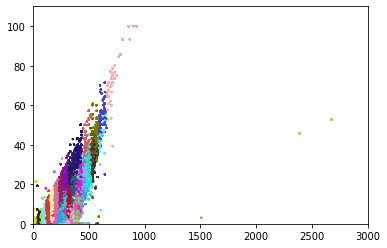

In [33]:
plt.ylim(top=110)
plt.xlim(right=3000)
plt.scatter(df["energy-kcal_100g"], df["fat_100g"], s=1, c=cmap[model.labels_])

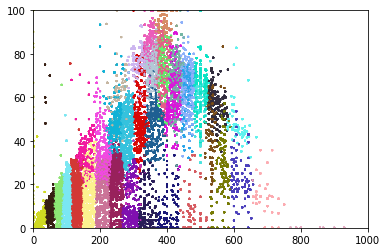

In [34]:
plt.ylim(top=100)
plt.xlim(right=1000)
plt.scatter(df["energy-kcal_100g"], df["carbohydrates_100g"], s=1, c=cmap[model.labels_])

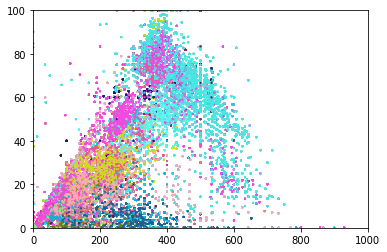

In [35]:
plt.ylim(top=100)
plt.xlim(right=1000)
plt.scatter(df["energy-kcal_100g"], df["carbohydrates_100g"], s=1, c=cmap[dataset["big_category_number"]])

## Nutrigrade

    "fat_100g",
    "saturated-fat_100g",
    "sugars_100g",
    "fiber_100g",
    "nutriscore_score"

In [36]:
cat = dataset["nutriscore_grade"].unique().tolist()
dataset["nutriscore_grade_number"] = dataset["nutriscore_grade"].apply(lambda x : cat.index(x) )

In [37]:
model=KMeans(n_clusters=len(dataset["nutriscore_grade"].unique()))
model.fit(df)

KMeans(n_clusters=5)

In [38]:
cmap = np.array([ np.random.choice(range(256), size=3)/256 for j in range(len(dataset["nutriscore_grade"].unique()))])

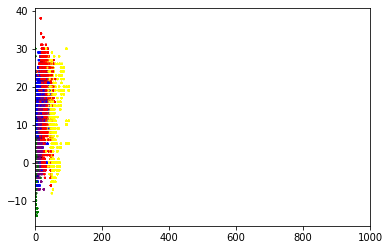

In [39]:
cmap = np.array(["green", "yellow", "blue", "purple", "red"])
# plt.ylim(top=100)
plt.xlim(right=1000)
plt.scatter(dataset["fat_100g"], dataset["nutriscore_score"], s=1, c=cmap[model.labels_])

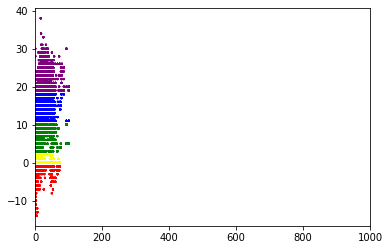

In [40]:
# plt.ylim(top=100)
plt.xlim(right=1000)
plt.scatter(dataset["fat_100g"], dataset["nutriscore_score"], s=1, c=cmap[dataset["nutriscore_grade_number"]])

## Correlation

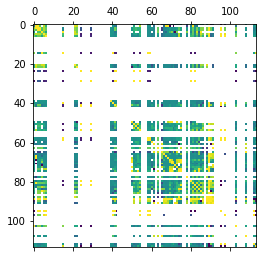

In [41]:
plt.matshow(dataset.corr())
plt.show()

In [42]:
rs = np.random.RandomState(0)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,energy-kcal_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-c_100g,calcium_100g,iron_100g,nutriscore_score
energy-kcal_100g,1.000000,0.764189,0.544473,0.057371,0.001509,0.566844,0.348160,0.291192,0.294121,-0.019875,-0.019874,-0.077747,0.140278,0.084020,0.620743
fat_100g,0.764189,1.000000,0.709659,0.063476,0.011330,-0.041517,0.000138,0.155377,0.304925,-0.013528,-0.013529,-0.123421,0.214218,0.000752,0.513451
saturated-fat_100g,0.544473,0.709659,1.000000,0.030459,0.020400,-0.031988,0.154926,-0.034110,0.197579,-0.033606,-0.033606,-0.130417,0.342039,-0.029150,0.600634
trans-fat_100g,0.057371,0.063476,0.030459,1.000000,-0.001398,0.019159,0.020709,-0.004902,-0.025556,0.012622,0.012622,-0.013621,-0.019881,-0.002764,0.059152
cholesterol_100g,0.001509,0.011330,0.020400,-0.001398,1.000000,-0.015907,-0.004298,-0.010028,0.019672,0.000359,0.000359,-0.006600,0.015069,-0.002481,0.009151
carbohydrates_100g,0.566844,-0.041517,-0.031988,0.019159,-0.015907,1.000000,0.638896,0.275556,-0.156766,-0.045368,-0.045367,0.051711,-0.138783,0.120406,0.330134
sugars_100g,0.348160,0.000138,0.154926,0.020709,-0.004298,0.638896,1.000000,-0.037296,-0.283566,-0.100338,-0.100338,0.052152,-0.100311,0.000094,0.499443
fiber_100g,0.291192,0.155377,-0.034110,-0.004902,-0.010028,0.275556,-0.037296,1.000000,0.194650,-0.027870,-0.027870,0.039636,-0.000412,0.134964,-0.179251
proteins_100g,0.294121,0.304925,0.197579,-0.025556,0.019672,-0.156766,-0.283566,0.194650,1.000000,0.070420,0.070421,-0.120059,0.410854,0.054752,0.092160
salt_100g,-0.019875,-0.013528,-0.033606,0.012622,0.000359,-0.045368,-0.100338,-0.027870,0.070420,1.000000,1.000000,-0.000978,0.014462,0.008239,0.130815


# Decision tree

In [43]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [44]:
df = dataset[[
    "energy-kcal_100g",
    "fat_100g",
    "saturated-fat_100g",
    "trans-fat_100g",
    "cholesterol_100g",
    "carbohydrates_100g",
    "sugars_100g",
    "fiber_100g",
    "proteins_100g",
    "salt_100g",
    "sodium_100g",
    "vitamin-c_100g",
    "calcium_100g",
    "iron_100g"
]]
Y = dataset[["nutriscore_grade"]]

In [47]:
dtc = DecisionTreeClassifier()
dtc.fit(df, Y)

TypeError: fit() missing 1 required positional argument: 'y'

[Text(178.08495520149822, 213.25846153846155, 'X[0] <= 163.5\ngini = 0.774\nsamples = 303705\nvalue = [60690, 34575, 55785, 100830, 51825]'),
 Text(87.24294324937487, 204.89538461538461, 'X[9] <= 0.849\ngini = 0.696\nsamples = 98925\nvalue = [43920, 22455, 21960, 6570, 4020]'),
 Text(61.20313614423206, 196.53230769230768, 'X[2] <= 1.005\ngini = 0.601\nsamples = 70245\nvalue = [40305, 15465, 9405, 1170, 3900]'),
 Text(40.00486680413842, 188.16923076923078, 'X[7] <= 0.55\ngini = 0.522\nsamples = 57990\nvalue = [38385, 9480, 5160, 1140, 3825]'),
 Text(19.622279338960865, 179.80615384615385, 'X[8] <= 3.3\ngini = 0.748\nsamples = 18525\nvalue = [6495, 4380, 3540, 615, 3495]'),
 Text(12.702382400818959, 171.44307692307692, 'X[6] <= 7.785\ngini = 0.75\nsamples = 11595\nvalue = [1230, 3165, 3225, 615, 3360]'),
 Text(4.933114049808687, 163.07999999999998, 'X[6] <= 1.339\ngini = 0.559\nsamples = 4500\nvalue = [285, 2865, 510, 555, 285]'),
 Text(2.9890850506813456, 154.71692307692308, 'X[9] <= 0.

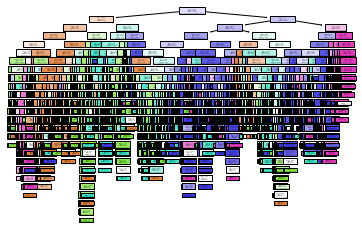

In [46]:
plot_tree(dtc, filled=True)

# DBSCAN

In [53]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [66]:
df = dataset[[
    "energy-kcal_100g",
    "fat_100g",
    "saturated-fat_100g",
    "trans-fat_100g",
    "cholesterol_100g",
    "carbohydrates_100g",
    "sugars_100g",
    "fiber_100g",
    "proteins_100g",
    "salt_100g",
    "sodium_100g",
    "vitamin-c_100g",
    "calcium_100g",
    "iron_100g"
]]
Y = dataset[["nutriscore_grade"]]

In [73]:
db = DBSCAN(eps=10, min_samples=5).fit(df)

In [74]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [75]:
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(dataset["nutriscore_grade"], labels))
print("Completeness: %0.3f" % metrics.completeness_score(dataset["nutriscore_grade"], labels))
print("V-measure: %0.3f" % metrics.v_measure_score(dataset["nutriscore_grade"], labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(dataset["nutriscore_grade"], labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(dataset["nutriscore_grade"], labels)
)
# print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df, labels))

Estimated number of clusters: 752
Estimated number of noise points: 0
Homogeneity: 0.090
Completeness: 0.143
V-measure: 0.111
Adjusted Rand Index: -0.003
Adjusted Mutual Information: 0.107


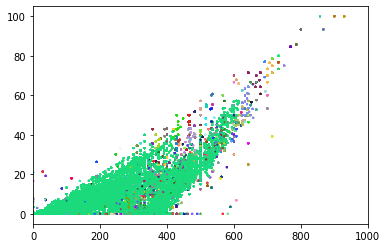

In [77]:
# cmap = np.array(["green", "yellow", "blue", "purple", "red"])
cmap = np.array([ np.random.choice(range(256), size=3)/256 for j in range(752)])
# plt.ylim(top=100)
plt.xlim(right=1000)
plt.scatter(df["energy-kcal_100g"], df["fat_100g"], s=1, c=cmap[labels])

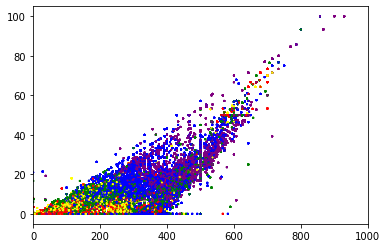

In [79]:
cmap = np.array(["green", "yellow", "blue", "purple", "red"])
# plt.ylim(top=110)
plt.xlim(right=1000)
plt.scatter(df["energy-kcal_100g"], df["fat_100g"], s=1, c=cmap[dataset["nutriscore_grade_number"]])

In [64]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = df[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = df[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key